# Итоговая работа

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances

## Ex 1

In [2]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

### 1

In [3]:
users_prox = pairwise_distances(ratings, metric='cosine').argmax(axis=1)
pairs = []
for i, nrst in enumerate(users_prox):
    pairs.append((i,nrst))
    
print(pairs)

[(0, 6), (1, 7), (2, 6), (3, 4), (4, 3), (5, 6), (6, 2), (7, 2), (8, 3), (9, 6)]


In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error as MSE

In [5]:
pca = PCA(n_components=5)

reduced_inv_pca = pca.inverse_transform(pca.fit_transform(ratings))

print('MSE для метода PCA:',MSE(ratings, reduced_inv_pca))

MSE для метода PCA: 1.2455442696728185


In [6]:
svd = TruncatedSVD(n_components=5)

reduced_inv_svd = svd.inverse_transform(svd.fit_transform(ratings))

print('MSE для метода TruncatedSVD:',MSE(ratings, reduced_inv_svd))

MSE для метода TruncatedSVD: 1.782006084929767


**Вывод**: метод *PCA* вносит меньшую ощибку при восстановлении исходной размерности данных

## Ex 2

In [7]:
from scipy.misc import derivative
from sympy import *

In [8]:
def f1(x):
    return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2

print('Значение производной функции f1 в т. x0=1:', derivative(f1, 1, dx=1e-8))

Значение производной функции f1 в т. x0=1: 55.38591754117306


In [9]:
x = symbols('x')

f1_sym = (tan(sin(x) + cos(2*x + 3)))**2
diff = diff(f1_sym, x)

print('Производная функции f1:')
diff

Производная функции f1:


2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [10]:
print('Значение производной функции f1 в т. x0=1:')
diff.evalf(subs={x:1})

Значение производной функции f1 в т. x0=1:


55.3859176353379

## Ex 3

In [11]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.optimize import Bounds

In [12]:
plt.style.use('seaborn-darkgrid')

In [13]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [14]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [15]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

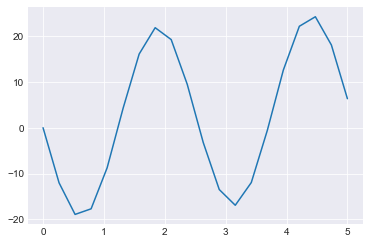

In [16]:
plt.plot(x, fx)
plt.show()

In [17]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
min_res = minimize(error, [0,0], method='COBYLA')
print(min_res)
print('\n',error(min_res.x))

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

 0.07674566111565184


In [19]:
bounds = Bounds([-10, -2*np.pi],[10, 2*np.pi])
evol_res = differential_evolution(error, bounds)
print(evol_res)
print('\n', error(evol_res.x))

     fun: 1.5147084981848025e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

 1.5147084981848025e-06


## Ex 4

In [20]:
import scipy.stats as sts

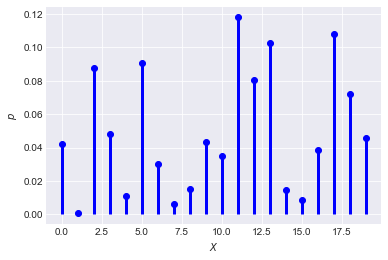

In [21]:
xk = np.arange(20)
pk = np.random.random(20)
pk = pk / pk.sum()

rv = sts.rv_discrete(values=(xk,pk))
sample = rv.rvs(size=1000)

plt.plot(xk,pk,'bo')
plt.vlines(xk,0,pk,'b',linewidths=3)
plt.xlabel('$X$')
plt.ylabel('$p$')
plt.show()

In [22]:
means = np.array([])
for i in range(1000):
    means = np.append(means, rv.rvs(size=50).mean())

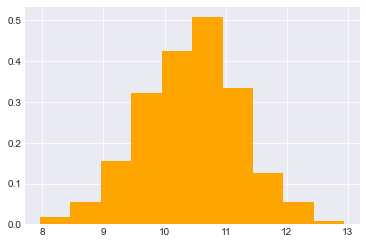

In [23]:
plt.hist(means, density=True, label=f'sample of 50 histogram', color='orange')
plt.show()

## Ex 5

In [24]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [25]:
eigvals, eigvectors = np.linalg.eig(m)

for i in range(len(eigvals)):
    print('Собственное значение:', round(eigvals[i], 2))
    print('Собственный вектор:', eigvectors[:, i])

Собственное значение: 3.0
Собственный вектор: [0.89442719 0.4472136 ]
Собственное значение: -1.0
Собственный вектор: [-0.89442719  0.4472136 ]


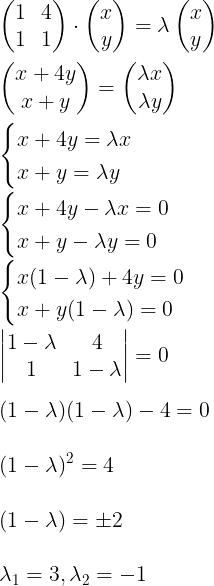

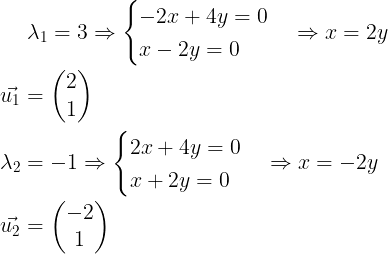